In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy 

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e5faf8897313982996a3d5636415ce23


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | gamba
Processing Record 2 of Set 12 | mogadishu
Processing Record 3 of Set 12 | itarema
Processing Record 4 of Set 12 | punta arenas
Processing Record 5 of Set 12 | butaritari
Processing Record 6 of Set 12 | port elizabeth
Processing Record 7 of Set 12 | tiksi
Processing Record 8 of Set 12 | ushuaia
Processing Record 9 of Set 12 | khonuu
City not found. Skipping...
Processing Record 10 of Set 12 | busselton
Processing Record 11 of Set 12 | luderitz
Processing Record 12 of Set 12 | bonthe
Processing Record 13 of Set 12 | haimen
Processing Record 14 of Set 12 | moose factory
Processing Record 15 of Set 12 | mataura
Processing Record 16 of Set 12 | chokurdakh
Processing Record 17 of Set 12 | tuktoyaktuk
Processing Record 18 of Set 12 | anadyr
Processing Record 19 of Set 12 | srednekolymsk
Processing Record 20 of Set 12 | jamestown
Processing Record 21 of Set 12 | iqaluit
Processing Record 22 of Set

Processing Record 36 of Set 15 | victoria
Processing Record 37 of Set 15 | vuktyl
Processing Record 38 of Set 15 | pangnirtung
Processing Record 39 of Set 15 | airai
Processing Record 40 of Set 15 | pochutla
Processing Record 41 of Set 15 | palabuhanratu
City not found. Skipping...
Processing Record 42 of Set 15 | oxford
Processing Record 43 of Set 15 | pevek
Processing Record 44 of Set 15 | aswan
Processing Record 45 of Set 15 | carmen
Processing Record 46 of Set 15 | santa isabel
Processing Record 47 of Set 15 | gamovo
Processing Record 48 of Set 15 | ancud
Processing Record 49 of Set 15 | chegdomyn
Processing Record 50 of Set 15 | mount gambier
Processing Record 1 of Set 16 | orlik
Processing Record 2 of Set 16 | namibe
Processing Record 3 of Set 16 | clyde river
Processing Record 4 of Set 16 | palauig
Processing Record 5 of Set 16 | olean
Processing Record 6 of Set 16 | champerico
Processing Record 7 of Set 16 | makokou
Processing Record 8 of Set 16 | wanning
Processing Record 9 of

Processing Record 23 of Set 19 | olafsvik
Processing Record 24 of Set 19 | khasan
Processing Record 25 of Set 19 | half moon bay
Processing Record 26 of Set 19 | furth im wald
Processing Record 27 of Set 19 | keflavik
Processing Record 28 of Set 19 | imbituba
Processing Record 29 of Set 19 | chihuahua
Processing Record 30 of Set 19 | camacha
Processing Record 31 of Set 19 | moerai
Processing Record 32 of Set 19 | glushkovo
Processing Record 33 of Set 19 | altay
Processing Record 34 of Set 19 | kloulklubed
Processing Record 35 of Set 19 | chapais
Processing Record 36 of Set 19 | jiuquan
Processing Record 37 of Set 19 | lander
Processing Record 38 of Set 19 | srandakan
Processing Record 39 of Set 19 | freeport
Processing Record 40 of Set 19 | singaraja
Processing Record 41 of Set 19 | kudahuvadhoo
Processing Record 42 of Set 19 | jacareacanga
Processing Record 43 of Set 19 | general pico
Processing Record 44 of Set 19 | polunochnoye
Processing Record 45 of Set 19 | tecoanapa
Processing R

Processing Record 11 of Set 23 | niksic
Processing Record 12 of Set 23 | salalah
Processing Record 13 of Set 23 | gorkovskoye
City not found. Skipping...
Processing Record 14 of Set 23 | vestmannaeyjar
Processing Record 15 of Set 23 | tenenkou
Processing Record 16 of Set 23 | vrede
Processing Record 17 of Set 23 | grandola
Processing Record 18 of Set 23 | berezovo
Processing Record 19 of Set 23 | pisco
Processing Record 20 of Set 23 | okhotsk
Processing Record 21 of Set 23 | shache
Processing Record 22 of Set 23 | ondorhaan
City not found. Skipping...
Processing Record 23 of Set 23 | kimbe
Processing Record 24 of Set 23 | turan
Processing Record 25 of Set 23 | kuching
Processing Record 26 of Set 23 | svetlaya
Processing Record 27 of Set 23 | merauke
Processing Record 28 of Set 23 | toliary
City not found. Skipping...
Processing Record 29 of Set 23 | mount isa
Processing Record 30 of Set 23 | shahr-e babak
Processing Record 31 of Set 23 | callaguip
Processing Record 32 of Set 23 | gajen

In [12]:
len(city_data)

556

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gamba,-2.65,10.00,79.61,87,90,5.82,GA,2020-04-15 05:23:47
1,Mogadishu,2.04,45.34,84.20,74,75,7.63,SO,2020-04-15 05:23:48
2,Itarema,-2.92,-39.92,74.48,87,90,3.49,BR,2020-04-15 05:23:48
3,Punta Arenas,-53.15,-70.92,46.40,87,75,9.17,CL,2020-04-15 05:23:48
4,Butaritari,3.07,172.79,83.55,80,45,15.10,KI,2020-04-15 05:19:51
5,Port Elizabeth,-33.92,25.57,60.80,100,75,3.36,ZA,2020-04-15 05:21:21
6,Tiksi,71.69,128.87,6.22,93,100,14.09,RU,2020-04-15 05:23:49
7,Ushuaia,-54.80,-68.30,44.60,81,40,4.70,AR,2020-04-15 05:23:49
8,Busselton,-33.65,115.33,73.99,32,36,14.97,AU,2020-04-15 05:23:49
9,Luderitz,-26.65,15.16,60.80,63,3,8.05,NA,2020-04-15 05:23:49


In [14]:
# -- New Column Order 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gamba,GA,2020-04-15 05:23:47,-2.65,10.00,79.61,87,90,5.82
1,Mogadishu,SO,2020-04-15 05:23:48,2.04,45.34,84.20,74,75,7.63
2,Itarema,BR,2020-04-15 05:23:48,-2.92,-39.92,74.48,87,90,3.49
3,Punta Arenas,CL,2020-04-15 05:23:48,-53.15,-70.92,46.40,87,75,9.17
4,Butaritari,KI,2020-04-15 05:19:51,3.07,172.79,83.55,80,45,15.10
5,Port Elizabeth,ZA,2020-04-15 05:21:21,-33.92,25.57,60.80,100,75,3.36
6,Tiksi,RU,2020-04-15 05:23:49,71.69,128.87,6.22,93,100,14.09
7,Ushuaia,AR,2020-04-15 05:23:49,-54.80,-68.30,44.60,81,40,4.70
8,Busselton,AU,2020-04-15 05:23:49,-33.65,115.33,73.99,32,36,14.97
9,Luderitz,NA,2020-04-15 05:23:49,-26.65,15.16,60.80,63,3,8.05


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.strftime("%x")
today

'04/14/20'

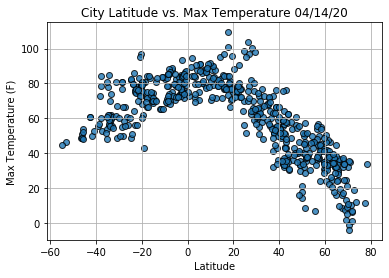

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

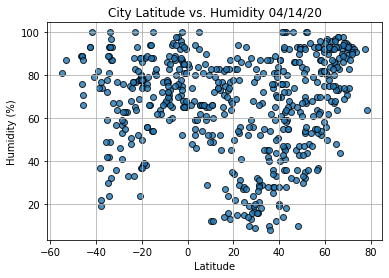

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()